***TRABAJO FINAL ANÁLITICA DE NEGOCIOS.***
**POR mARIO ALBERTO MEJIA ELJACH & SANTIAGO PEDRAZA SILVA.**

0. Cargar librerias de trabajo.

In [ ]:
import numpy as np # Funciones matemáticas.
import pandas as pd # Comunicación con Excel.
from sklearn.naive_bayes import GaussianNB # Función Gaussiana.
from sklearn.metrics import confusion_matrix # La métrica de medida.

import matplotlib.pyplot as plt
import seaborn as sns

#Prestamo interbibliotecario.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

**Análisis NaiveBayes.**

1. Se sube la base de datos y se convierte en una tabla de datos.

In [ ]:
import pandas as pd

# Load the CSV file to examine its structure
file_path = '/content/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its current structure

data.to_csv('mi_tabla.csv', index=False)  # Para guardar como CSV sin el índice
data.to_excel('mi_tabla.xlsx', index=False)

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2. Se seleccionan las variables de interes.

In [ ]:
#Seleccionamos variables de interes
XDB=data.copy()
XDB=XDB[['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type', 'avg_glucose_level','bmi','smoking_status','stroke']]
print(XDB) # Mostrar base de datos

# Datos de entrada.
XD=np.array(XDB[['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type', 'avg_glucose_level','bmi','smoking_status','stroke']])
#Dato de salida
yd=np.array(XDB['heart_disease'])

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

3. Implementar modelo. Configuración del modelo. Datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Import SimpleImputer for imputation

# Assuming 'data' is your DataFrame

# Select relevant columns for features and target variable
XDB = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status','stroke']]  # Features
yd = data['heart_disease']  # Target variable

# Create a LabelEncoder object
le = LabelEncoder()

# Convert categorical features to numerical using Label Encoding
for column in XDB.columns:
    if XDB[column].dtype == type(object):  # Check if the column is of object type (string)
        XDB[column] = le.fit_transform(XDB[column])  # Apply Label Encoding

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
XDB_imputed = imputer.fit_transform(XDB)

# Convert the imputed DataFrame to a NumPy array
XD = XDB_imputed

# Create and train the Gaussian Naive Bayes model
mnb = GaussianNB()
mnb.fit(XD, yd)

# Make predictions
ydp = mnb.predict(XD)

#Parametro del modelo por categoría - PreApr/PreNeg
u=mnb.theta_ # Se estiman medias.
sigma=np.sqrt(mnb.var_) # Se estiman desviaciones.

#Las variaciones de las variables

LI=u-sigma
LS=u+sigma

print("La media de las variables por categoria:")
print(u)
print("El límite inferior de las variaciones de las variables por categoria:")
print(LI)
print("El límite superior de las variaciones de las variables por categoria:")
print(LS)

#Metrica de evaluación - Como se comporto el modelo identificando la PreApr+PreNeg

cm=confusion_matrix(yd, ydp)
print("Matriz de confusión:")
print(cm)

La media de las variables por categoria:
[[4.04220108e-01 4.18014067e+01 8.97807199e-02 0.00000000e+00
  6.43152669e-01 2.17501034e+00 5.07654117e-01 1.04396494e+02
  2.88216930e+01 1.36450145e+00 4.17873397e-02]
 [5.90579710e-01 6.81884058e+01 2.31884058e-01 1.00000000e+00
  8.84057971e-01 2.03985507e+00 5.14492754e-01 1.36818768e+02
  3.01462928e+01 1.59420290e+00 1.70289855e-01]]
El límite inferior de las variaciones de las variables por categoria:
[[-8.69438146e-02  1.95496413e+01 -1.96090217e-01 -1.43185178e-03
   1.64081313e-01  1.07587472e+00  7.71065517e-03  6.09689166e+01
   2.10035934e+01  2.91286121e-01 -1.58320651e-01]
 [ 9.88507540e-02  5.65959602e+01 -1.90153727e-01  9.98568148e-01
   5.63899377e-01  1.12984201e+00  1.47007866e-02  7.41095785e+01
   2.51711567e+01  5.78829599e-01 -2.05600116e-01]]
El límite superior de las variaciones de las variables por categoria:
[[8.95384030e-01 6.40531721e+01 3.75651657e-01 1.43185178e-03
  1.12222402e+00 3.27414597e+00 1.00759758e+0

<ipython-input-33-e899199110c6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB[column] = le.fit_transform(XDB[column])  # Apply Label Encoding
<ipython-input-33-e899199110c6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB[column] = le.fit_transform(XDB[column])  # Apply Label Encoding
<ipython-input-33-e899199110c6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

4. Verdaderos negativos

In [ ]:
VN=cm[0,0] # Verdaderos negativos
FP=cm[0,1] # Falsos positivos
FN=cm[1,0] # Falsos negativos
VP=cm[1,1] # Verdaderos positivos

Exactitud=(VP+VN)/len(XD)
print("La exactitud es:", Exactitud) #Comportamiento general.

#Tasa de error.
TE=(FP+FN)/len(XD)
print("La tasa de error es:", TE)

sensibilidad=VP/(VP+FN)
print("La sensibilidad es:", sensibilidad)

Especificidad=VN/(VN+FP)
print("La especificidad es:", Especificidad)

precision=VP/(VP+VN)
print("La precisión es:", precision)

La exactitud es: 1.0
La tasa de error es: 0.0
La sensibilidad es: 1.0
La especificidad es: 1.0
La precisión es: 0.05401174168297456


5. Cálculo de porcentajes.

In [ ]:
porcentajes = XDB[['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status','stroke']].value_counts(normalize=True) * 100
print(porcentajes)

gender  age    hypertension  heart_disease  avg_glucose_level  bmi   smoking_status  stroke
0       0.08   0             0              139.67             14.1  0               0         0.020371
1       15.00  0             0              104.90             27.4  2               0         0.020371
                                            190.13             20.7  2               0         0.020371
                                            144.15             24.1  2               0         0.020371
                                            142.82             27.6  2               0         0.020371
                                                                                                 ...   
0       48.00  1             0              221.08             57.2  2               0         0.020371
               0             1              101.89             25.1  3               0         0.020371
                             0              255.17             38.1  1      

**Análisis KMeans:**



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


esta es la matriz de correlación:
                         age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276398       0.263796           0.238171   
hypertension       0.276398      1.000000       0.108306           0.174474   
heart_disease      0.263796      0.108306       1.000000           0.161857   
avg_glucose_level  0.238171      0.174474       0.161857           1.000000   
bmi                0.333398      0.167811       0.041357           0.175502   
stroke             0.245257      0.127904       0.134914           0.131945   

                        bmi    stroke  
age                0.333398  0.245257  
hypertension       0.167811  0.127904  
heart_disease      0.041357  0.134914  
avg_glucose_level  0.175502  0.131945  
bmi                1.000000  0.042374  
stroke             0.042374  1.000000  


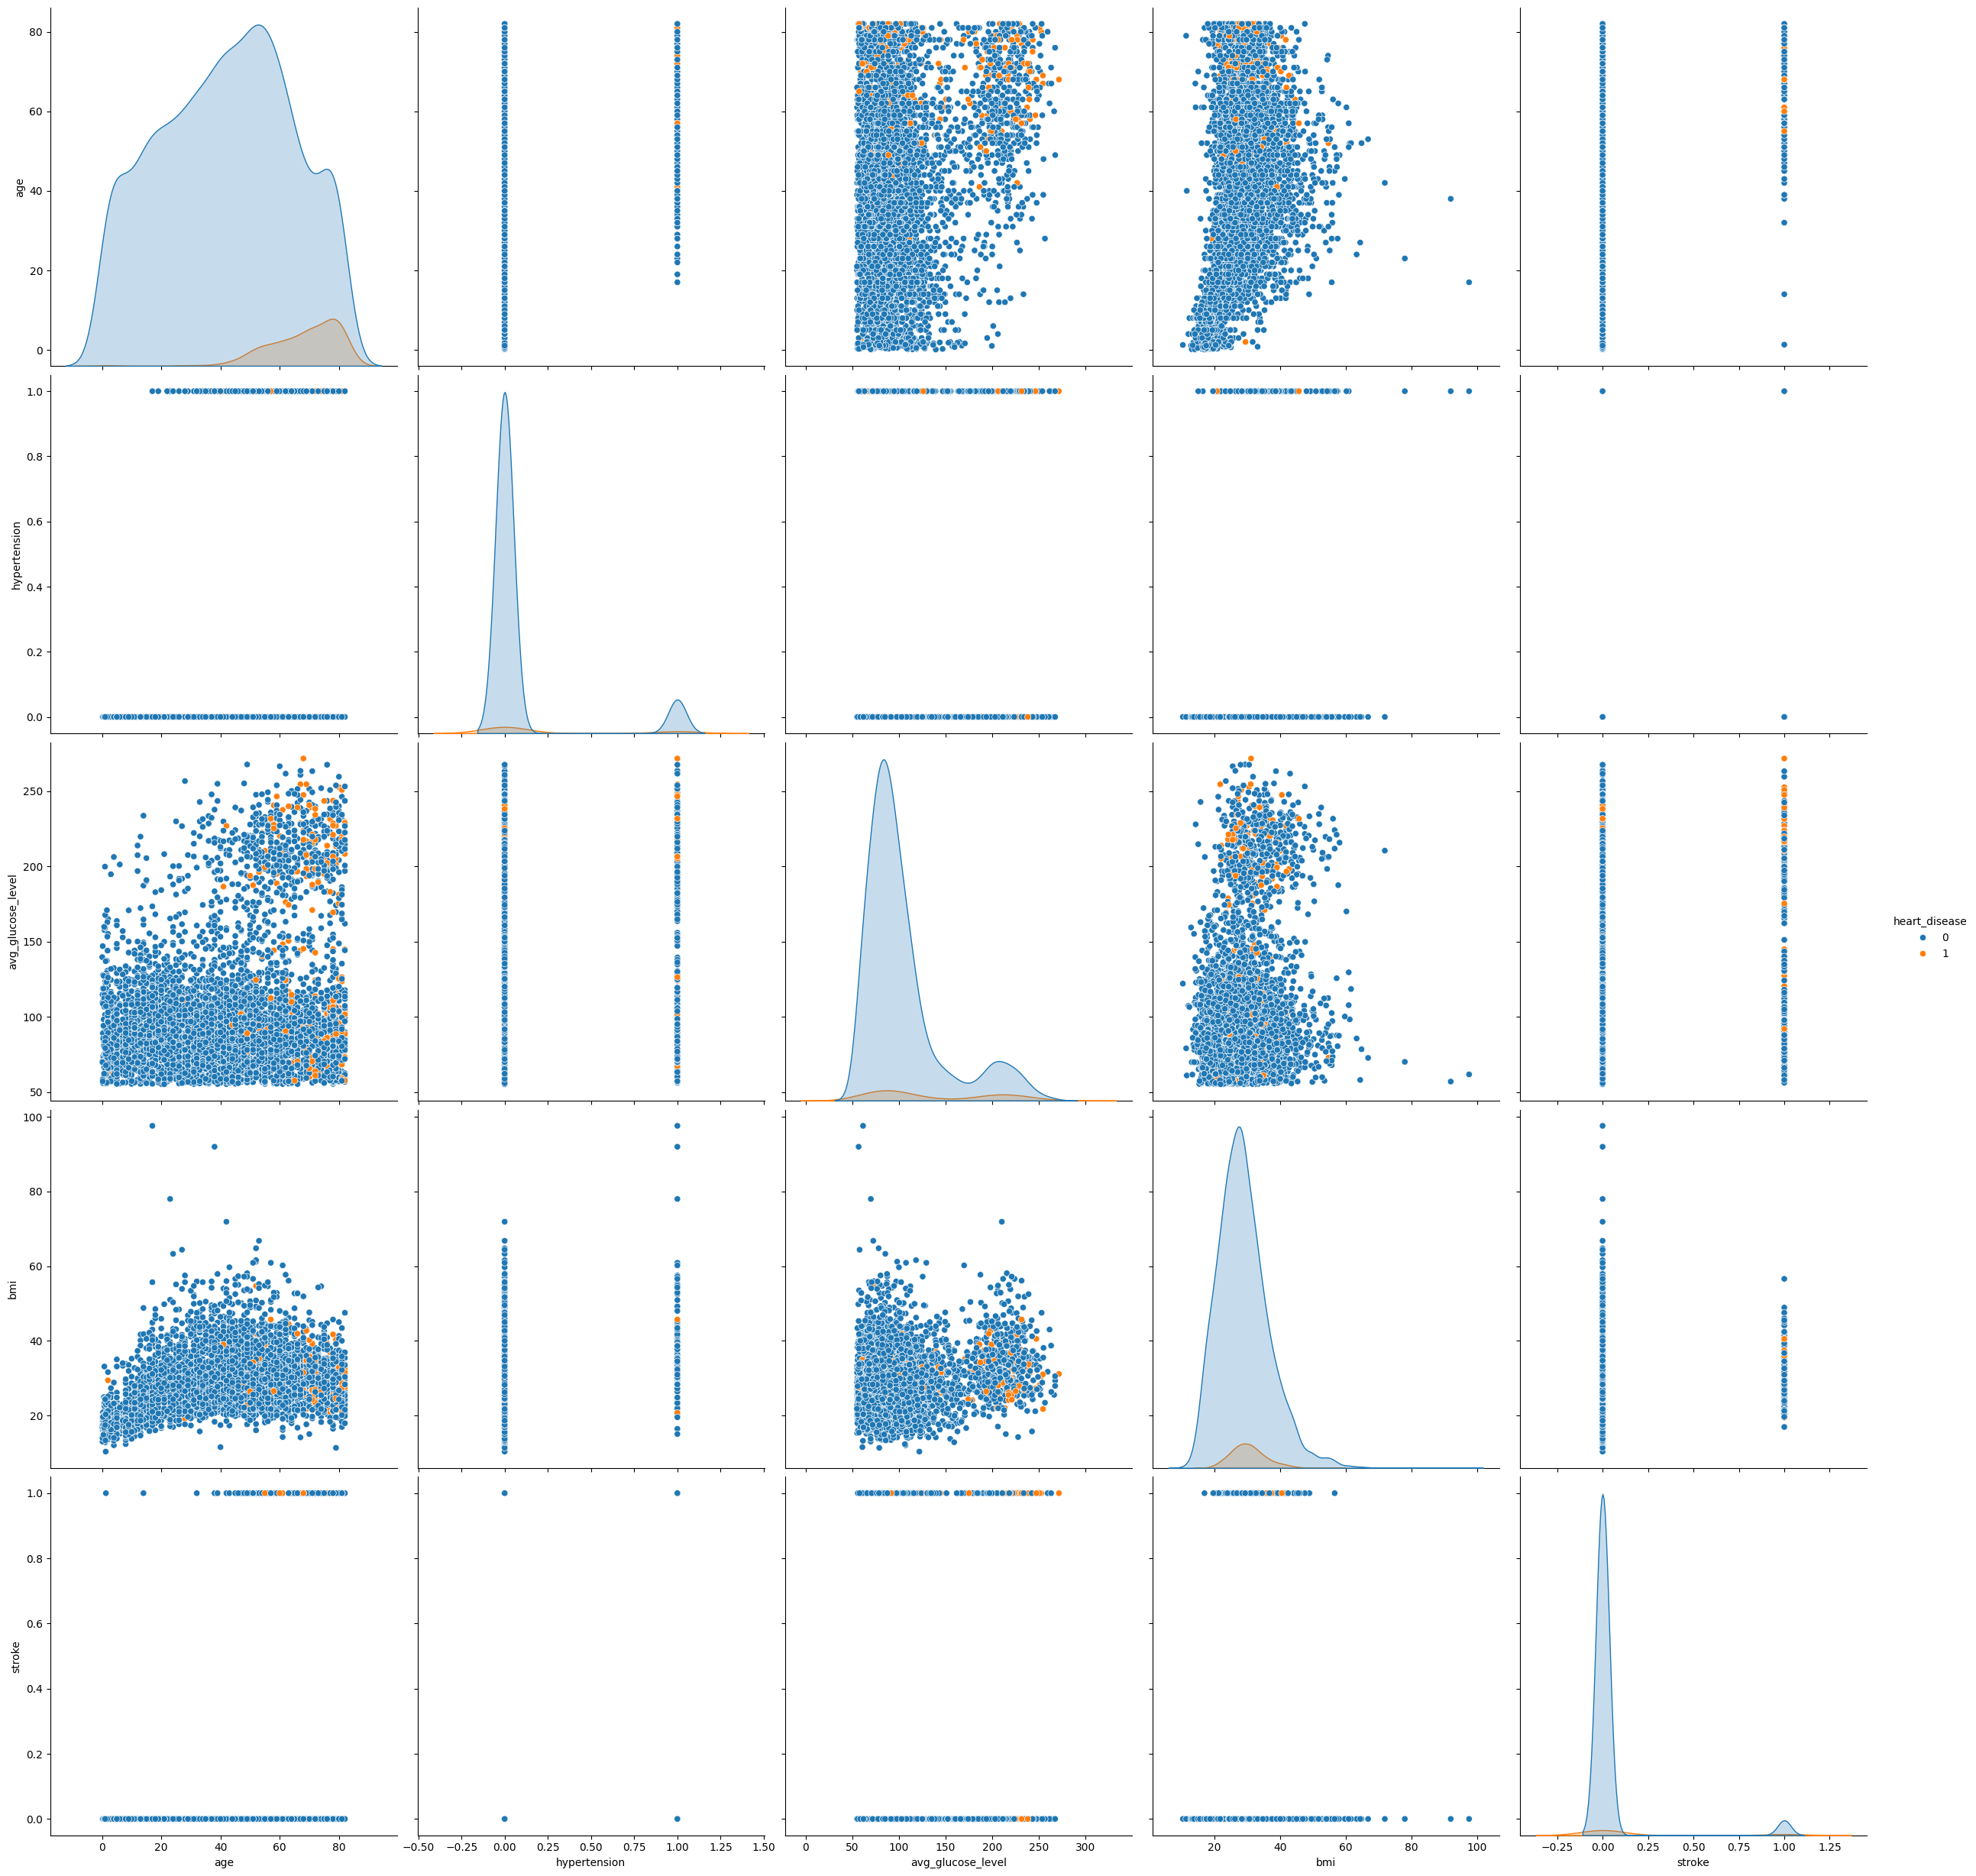

In [ ]:
XDB=XDB[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]

sns.pairplot(XDB, hue='heart_disease', size=5, vars=['age', 'hypertension', 'avg_glucose_level', 'bmi', 'stroke'])


#para confirmar la buena correlación
corr = XDB.corr()
print("esta es la matriz de correlación:\n",corr)

#Se procede con la configuración de datos de entrada y datos de salida.

XD=np.array(XDB.iloc[:,0:5])
YD=XDB.iloc[:,5]

6. Se comienza con el modelo KNN.

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
esta es la matriz de confusión:
 [[4860    1]
 [ 249    0]]
Exactitud: 0.9510763209393346
Sensibilidad: 0.0
Especificidad: 0.9997942810121374
El modelo me inscribe o no [0]


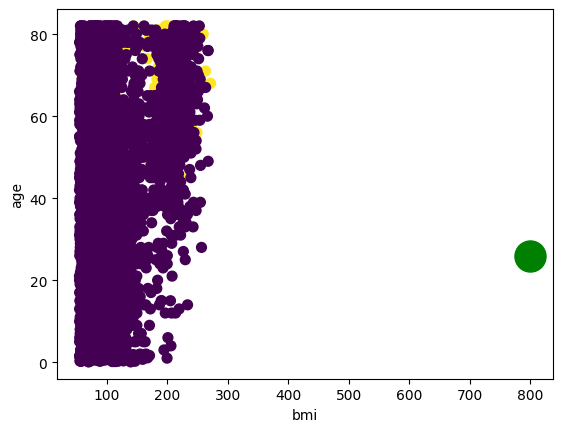

In [ ]:
!pip install sklearn
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
# ... (your previous code) ...

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'

# Fit the imputer on your data and transform it
XD = imputer.fit_transform(XD)

# Now, you can proceed with training your model
mknn = KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD, YD)

#Evaluacion del funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusión.

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(YD,ydp)
print("esta es la matriz de confusión:\n",cm)

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Spec)

#Model tienen o no tiene una enfermedad del corazón.

XDP=np.array([[26, 0, 36.6, 800, 15]])
ydpp=mknn.predict(XDP)
print("El modelo me inscribe o no",ydpp)

#Las gráficas siempre se hacen con las variables que tiene más correlación.
# The scatter plot code also needs to be adjusted to use the correct features
# Assuming the first two features in XD are the ones you want to plot
plt.scatter(XD[:,3],XD[:,0],c=YD,s=50,cmap="viridis")
# Adjust the scatter plot for XDP to use the corresponding features
plt.scatter(XDP[:,3],XDP[:,0],marker="o",s=500,facecolors="green")
plt.xlabel('bmi');plt.ylabel('age')
plt.show()

7. Creación de clusters.

Donde que el primer solicitante 1
Donde que el segundo solicitante 1
Donde que el tercer solicitante 3
Donde que el cuarto solicitante 1
Donde que el quinto solicitante 1


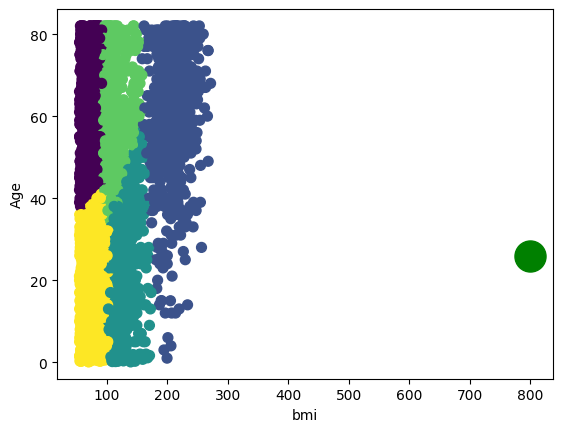

El modelo diagnostica? [1]
No sano 1.0
Sano 0.0
No sano 1.0
Sano 0.0
No sano 1.0
Sano 0.0
No sano 1.0
Sano 0.0
No sano 2.7065217391304346
Sano 0.0
Las caracteristicas de cada cluster son.
 [[5.89230769e+01 1.24719940e-01 6.79611650e-02 7.52655713e+01
  3.03002601e+01]
 [6.04726989e+01 2.58970359e-01 1.60686427e-01 2.10268378e+02
  3.28844936e+01]
 [2.20979775e+01 2.08667737e-02 3.21027287e-03 1.24983483e+02
  2.58557719e+01]
 [5.78897716e+01 1.26117180e-01 7.84508441e-02 1.07674101e+02
  3.02283715e+01]
 [2.07766400e+01 1.66666667e-02 6.66666667e-04 8.03729800e+01
  2.62968773e+01]]


In [ ]:
np.random.seed(42) #Para que a todos nos de el mismo modelo.
k=5 #5 Clusters . montoncitos de datos.
mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD,YD)
ydp2=mkm.predict(XD)
labels=mkm.labels_
print("Donde que el primer solicitante",labels[0])
print("Donde que el segundo solicitante",labels[1])
print("Donde que el tercer solicitante",labels[2])
print("Donde que el cuarto solicitante",labels[3])
print("Donde que el quinto solicitante",labels[4])

#Se mapean los clusters - como quedaron clasificados solicitantes.

plt.scatter(XD[:,3],XD[:,0],c=labels,s=50,cmap="viridis")
plt.scatter(XDP[:,3],XDP[:,0],marker="o",s=500,facecolors="green")
plt.xlabel('bmi');plt.ylabel('Age')
plt.show()
#Donde quede yo?

XDP=np.array([[26, 0, 36.6, 800, 15]])
ydpp2=mkm.predict(XDP)
print("El modelo diagnostica?",ydpp2)

#Cual es el porcentaje de inscritos y no inscritos en los clusters.

c00=len(np.where((labels==0)& (YD==0))[0]) #Cluster 0 porcentaje de inscritos y no incirtos.
c01=len(np.where((labels==0)& (YD==3))[0])
print("No sano", c00/(c00+c01))
print("Sano", c01/(c00+c01))

c10=len(np.where((labels==1)& (YD==0))[0]) #Cluster 1 porcentaje de inscritos y no incirtos.
c11=len(np.where((labels==1)& (YD==3))[0])
print("No sano", c10/(c10+c11))
print("Sano", c11/(c10+c11))

c20=len(np.where((labels==2)& (YD==0))[0]) #Cluster 2 porcentaje de inscritos y no incirtos.
c21=len(np.where((labels==2)& (YD==3))[0])
print("No sano", c20/(c20+c21))
print("Sano", c21/(c20+c21))

c30=len(np.where((labels==3)& (YD==0))[0]) #Cluster 3 porcentaje de inscritos y no incirtos.
c31=len(np.where((labels==3)& (YD==3))[0])
print("No sano", c30/(c30+c31))
print("Sano", c31/(c30+c31))

c40=len(np.where((labels==4)& (YD==0))[0]) #Cluster 4 porcentaje de inscritos y no incirtos.
c41=len(np.where((labels==4)& (YD==3))[0])
print("No sano", c40/(c10+c41))
print("Sano", c41/(c10+c41))

#Cual es la caracteristica sociodemográfica de cada cluster.

clusters=mkm.cluster_centers_
print("Las caracteristicas de cada cluster son.\n",clusters)